In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

### Data Preparation

#### 1. Loading the data

In [46]:
#Load the GDP data and metadata from the downloaded data files
gdp_data = pd.read_csv('Data/GPD Per Capita PPP.csv', skiprows = 4, index_col=1)
gdp_metadata = pd.read_csv('Data/GPD Per Capita PPP Metadata.csv', index_col=0)
#Drop the columns named 'Unnamed'
gdp_data.drop(gdp_data.filter(regex="Unnamed"),axis=1, inplace=True)
gdp_metadata.drop(gdp_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [47]:
#Load the Maternal Mortality Rate and metadata from the downloaded data files
mortality_rate_data = pd.read_csv('Data/Maternal Mortality Rate Data.csv', skiprows = 4, index_col=1)
mortality_rate_metadata = pd.read_csv('Data/Maternal Mortality Rate Metadata.csv', index_col=0)
#Drop the columns named 'Unnamed'
mortality_rate_data.drop(mortality_rate_data.filter(regex="Unnamed"),axis=1, inplace=True)
mortality_rate_metadata.drop(mortality_rate_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [48]:
#Merge the GDP data and metadata dataframes into one dataframe
gdp_df = pd.merge(gdp_metadata,gdp_data,on='Country Code')
gdp_df.sample()

,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,1960,1961,1962,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Code,,,,,,,,,,,,,,,,,,,,,
PST,NaN,NaN,Post-dividend countries are mostly high-income...,Post-demographic dividend,Post-demographic dividend,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,...,42000.754118,43102.624515,44188.432059,45674.576831,47495.813548,49497.607811,51411.032518,49926.497747,54218.912306,59341.234663


In [49]:
#Merge the Mortality Rate data and metadata dataframes into one dataframe
mortality_rate_df = pd.merge(mortality_rate_metadata,mortality_rate_data,on='Country Code')
mortality_rate_df.sample()

,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,1960,1961,1962,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Code,,,,,,,,,,,,,,,,,,,,,
JOR,Middle East & North Africa,Lower middle income,NaN,Jordan,Jordan,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,...,45.0,45.0,46.0,43.0,42.0,42.0,41.0,41.0,NaN,NaN


### 2. Preparing the data


In [50]:
#Trim the GDP and malnutrition prevalance dataframes by dropping columns we will not use
gdp_df = gdp_df.drop(["IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
mortality_rate_df = mortality_rate_df.drop(["IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [53]:
#Use the pandas melt() function on the mortality rate and GDP dataframes to transpose the columns containing years into rows grouped by year
gdp_df = gdp_df.melt(ignore_index=False,id_vars=["Region"],var_name="Year",value_name="GDP").copy()
mortality_rate_df = mortality_rate_df.melt(ignore_index=False,id_vars=["Region"],var_name="Year",value_name="MortalityRate").copy()

### 3. Visualizing and saving the data

In [ ]:
# Create the directory that will hold the exported image
if not os.path.exists('exports'):
    os.mkdir('exports')

In [87]:
mortality_rate_df

,Region,Year,MortalityRate
Country Code,,,
ABW,Latin America & Caribbean,1960,NaN
AFE,NaN,1960,NaN
AFG,South Asia,1960,NaN
AFW,NaN,1960,NaN
AGO,Sub-Saharan Africa,1960,NaN
...,...,...,...
XKX,Europe & Central Asia,2022,NaN
YEM,Middle East & North Africa,2022,NaN
ZAF,Sub-Saharan Africa,2022,NaN


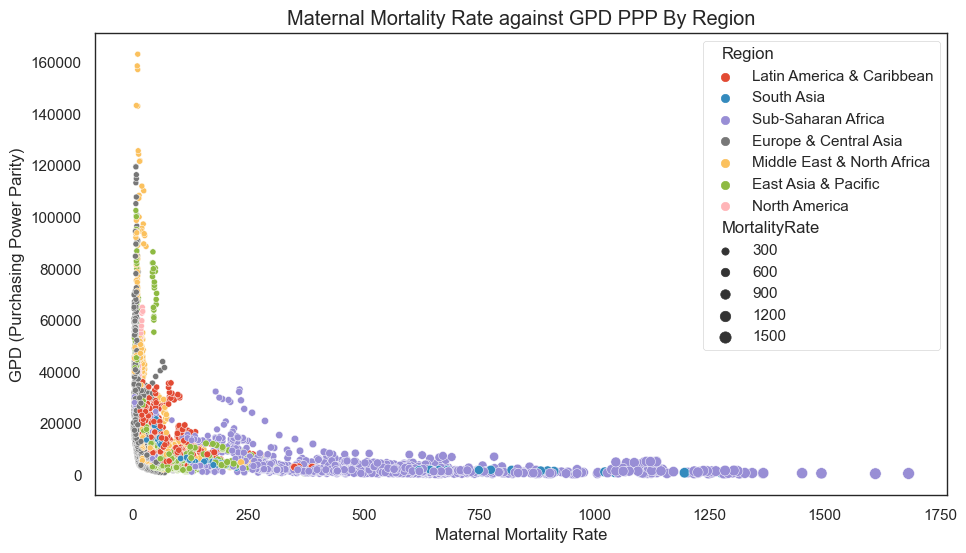

In [97]:
# Set the plot style
sns.set_style("white")

#Plot a scatterplot of mortality rate data against GDP
plt.figure(figsize=(11,6))
plt.title("Maternal Mortality Rate against GPD PPP By Region")
plt.xlabel("Maternal Mortality Rate")
plt.ylabel("GPD (Purchasing Power Parity)")
sns.scatterplot(x=mortality_rate_df['MortalityRate'],y=gdp_df['GDP'], markers='.',
                size=mortality_rate_df['MortalityRate'],hue=gdp_df['Region'])

# Save the plot as a PNG file
plt.savefig("exports/mortality_rate_vs_gdp.jpg")

# Display the plot
plt.show()